In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
#code cell 1
#import modules
import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

d = pd.read_csv('/content/sample_data/glucose.csv', sep = "\s+", skip_blank_lines=False, header=30)

#print('data head')
#print(d.head())

In [67]:
#code cell 2 
#extract features
rbg = d['rbg'].values
#print("rbg", rbg[0:5])
hba1c = d['hba1c'].values
#print("hba1c", hba1c[0:5])

In [68]:
#code cell 3
#split data into training and fitting sets
from sklearn.model_selection import train_test_split

#Set random number generator seed
np.random.seed(5)

#split data 
rbg_fit_val, rbg_test, hba1c_fit_val, hba1c_test = train_test_split(rbg, hba1c, test_size=0.25)
print ("fit rbg shape", rbg_fit_val.shape, "test rbg shape", rbg_test.shape)


fit rbg shape (261,) test rbg shape (88,)


In [69]:
#code cell 4
def poly_features(x, degree):
  """calculate polynomial features
  Parameters
  ----------
  x: float / np.ndarray(n_samples)
    value(s) of positions to calculate features for
  degree: int
    degree of highest order polynomial

  Returns
  -------
    features: np.ndarray(n_features) / np.ndarray(n_samples, n_features)
      feature vector (for scalar input) or array (for vector input)
  """
  
  features = [x**i for i in range(1, degree+1)]
  
  if isinstance(x, float):
    # x is a scalar, features is a list
    return np.array([1.0] + features)
  else:
    # (assume) x is a 1-D vector, so construct 2-D array with rows as samples 
    # and columns are features
    vec_of_ones = np.ones(len(x))
    # np.stack() will make a 2-D array with each vector (samples) as a _row_
    # need transpose to fix order
    return np.stack([ vec_of_ones ] + features).T

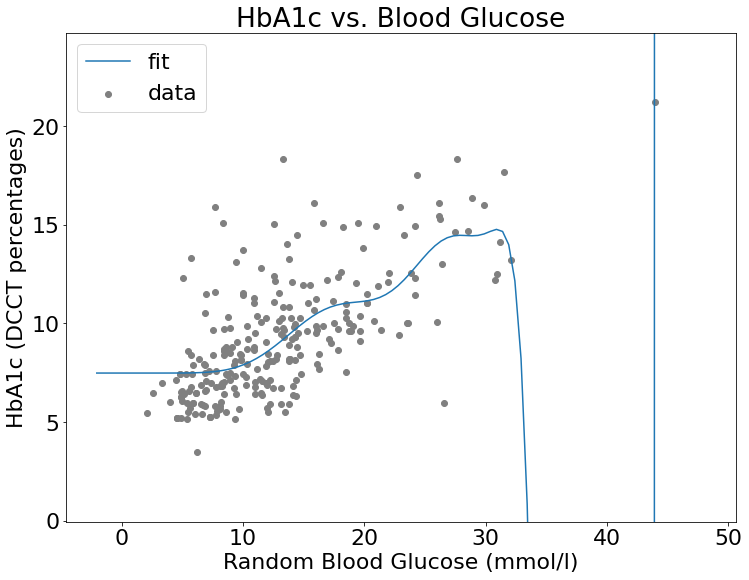

In [70]:
#code cell 5
# linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression() # leaving out normalize changes the fit
model.fit(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)

#Plot Results

# global constants for nicer plotting
figsize = (12, 9)
plt.rcParams.update({'font.size': 22})

# calculate range for plotting predictions
rbg_range = np.max(rbg_fit_val) - np.min(rbg_fit_val)

# create array of x positions for predictions
predict_pts = np.linspace(np.min(rbg_fit_val) - 0.1*rbg_range,
                          np.max(rbg_fit_val) + 0.1*rbg_range, 100)
#print(predict_pts)
#Calculate appropriate limits for y-axis
hba1c_range = np.max(hba1c_fit_val) - np.min(hba1c_fit_val)
hba1c_ax_min = np.min(hba1c_fit_val) - 0.2*hba1c_range
hba1c_ax_max = np.max(hba1c_fit_val) + 0.2*hba1c_range

fig, ax = plt.subplots(figsize=figsize)
ax.set_ylim(hba1c_ax_min, hba1c_ax_max)
ax.scatter(rbg_fit_val, hba1c_fit_val, label='data', color='grey')
# ax.scatter(rbg_test, hba1c_test, label='test', color='blue')
ax.plot(predict_pts, model.predict(poly_features(predict_pts, degree=15)), label='fit')
ax.set_title('HbA1c vs. Blood Glucose')
ax.set_xlabel('Random Blood Glucose (mmol/l)')
ax.set_ylabel('HbA1c (DCCT percentages)')
ax.legend()
fig.show()


In [71]:
#cell 6
#find R squared
#Calculate score for fitting data
score_fit = model.score(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)
print('Score for fitting data:', score_fit)

#Calculate score for testing data
score_test = model.score(poly_features(rbg_test, degree=15), hba1c_test)
print('Score for testing data:', score_test)

Score for fitting data: 0.45934149140940067
Score for testing data: -7.477425850653521


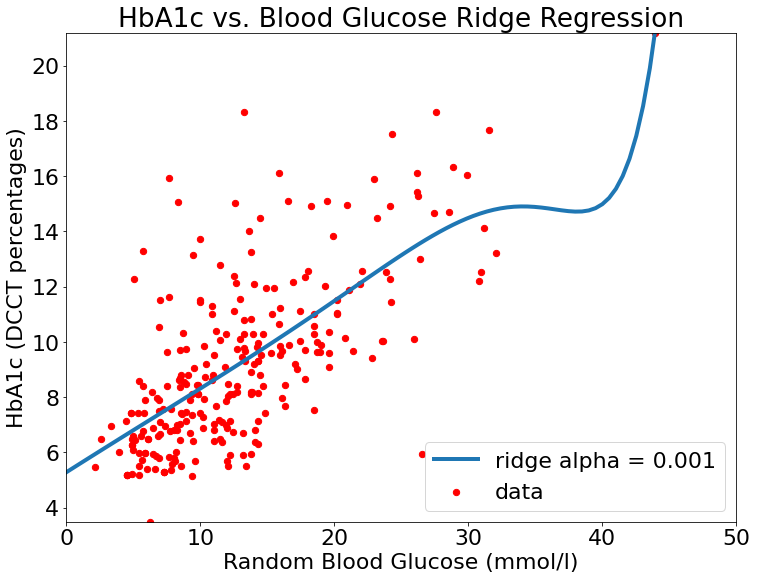

In [58]:
#part 2
#define ridge model
from sklearn.linear_model import Ridge

ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)

figsize = (12,9)
plt.rcParams.update({'font.size': 22})

# calculate range for plotting predictions
rbg_range = np.max(rbg_fit_val) - np.min(rbg_fit_val)

# create array of x positions for predictions
predict_pts = np.linspace(np.min(rbg_fit_val) - 0.1*rbg_range,
                          np.max(rbg_fit_val) + 0.1*rbg_range,100)

fig, ax = plt.subplots(figsize=figsize)
ax.set_ylim(np.min(hba1c_fit_val),np.max(hba1c_fit_val))
ax.scatter(rbg_fit_val, hba1c_fit_val, s=40, label='data', color='red')
ax.plot(predict_pts, ridge_model.predict(poly_features(predict_pts, degree=15)), lw=4, label='ridge alpha = 0.001')
ax.set_xlim(0,50)
ax.set_title('HbA1c vs. Blood Glucose Ridge Regression')
ax.set_xlabel('Random Blood Glucose (mmol/l)')
ax.set_ylabel('HbA1c (DCCT percentages)')
ax.legend()
fig.show()

In [72]:
#Calculate score for fitting data
score_fit = ridge_model.score(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)
print('Score for fitting data:', score_fit)

Score for fitting data: 0.4764531639771417


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.04226e-17): result may not be accurate.
  overwrite_a=True).T


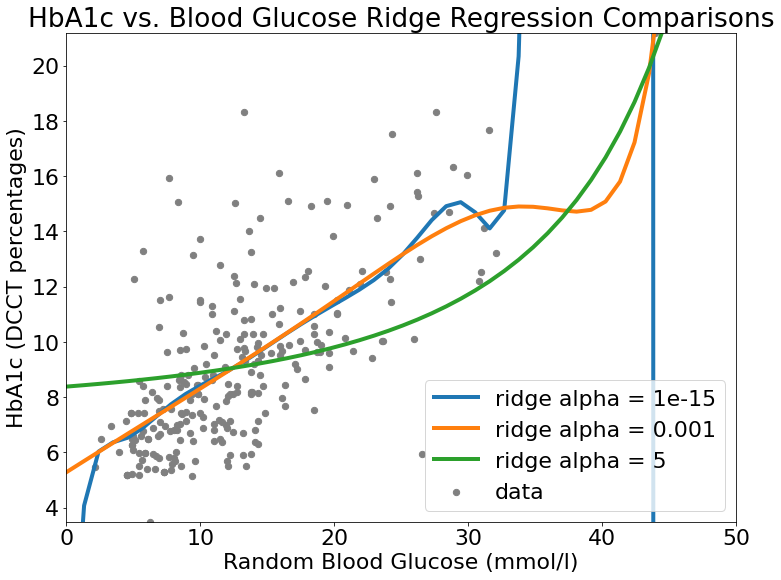

In [61]:
#ridge 1 is too small-too many oscillations-overfitting
ridge_model_1 = Ridge(1e-15, normalize=True)
ridge_model_1.fit(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)
#ridge 2 is best fit- 
ridge_model_2 = Ridge(0.001, normalize=True)
ridge_model_2.fit(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)
#ridge 3 is too big-curve too smooth
ridge_model_3 = Ridge(5, normalize=True)
ridge_model_3.fit(poly_features(rbg_fit_val, degree=15), hba1c_fit_val)

predict_pts = np.linspace(-3.0, 50)
fig, ax = plt.subplots(figsize=figsize)
ax.set_ylim(np.min(hba1c_fit_val),np.max(hba1c_fit_val))
ax.scatter(rbg_fit_val, hba1c_fit_val, s=40, label='data', color='grey')

ax.plot(predict_pts, ridge_model_1.predict(poly_features(predict_pts, degree=15)), lw=4, label='ridge alpha = 1e-15')
ax.plot(predict_pts, ridge_model_2.predict(poly_features(predict_pts, degree=15)), lw=4, label='ridge alpha = 0.001')
ax.plot(predict_pts, ridge_model_3.predict(poly_features(predict_pts, degree=15)), lw=4, label='ridge alpha = 5')
ax.set_xlim(0,50)
ax.set_title('HbA1c vs. Blood Glucose Ridge Regression Comparisons')
ax.set_xlabel('Random Blood Glucose (mmol/l)')
ax.set_ylabel('HbA1c (DCCT percentages)')
ax.legend()
fig.show()

#Extra credit question
If you only used the first 50 values of a set of data it would not be equivalent to using all of the data. That is because less data points will impact your fit data and test data and reduce the number of data points used to fit the curve therefore less data points means the curve is more smooth and 
alot less oscillations. The values will be around the same area in the graph and therfore the curve will be more smooth.